# Handwritten digits classification using neural network


In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [10]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [2]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

label :  2


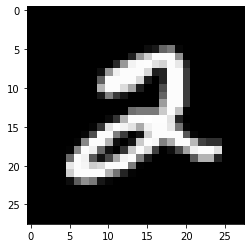

In [6]:
ind = 5
print("label : ",y_train[ind])
plt.imshow(X_train[ind],'gray')

In [7]:
X_train[ind]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape , X_test_flattened.shape

((60000, 784), (10000, 784))

## Very simple neural network with no hidden layers


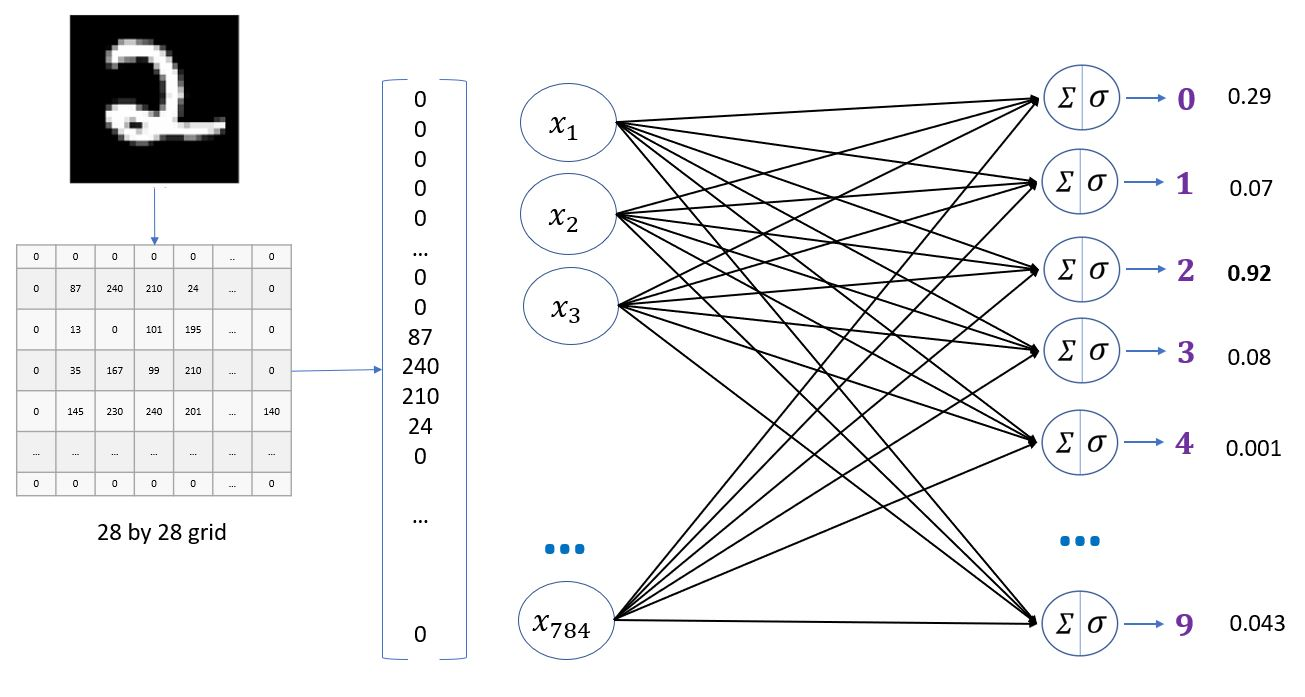

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.4686 - accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3044 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2667 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2621 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9280
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2551 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2530 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.25

In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2632 - accuracy: 0.9292


[0.26320087909698486, 0.9291999936103821]

In [30]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])

7

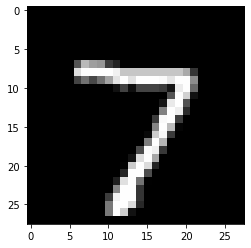

In [31]:

plt.imshow(X_test[0],'gray')

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    8,    8,    4,    1,    0],
       [   0, 1116,    4,    2,    0,    1,    3,    2,    7,    0],
       [   3,    8,  935,   14,    7,    5,   11,    8,   36,    5],
       [   2,    0,   20,  917,    0,   30,    2,   12,   22,    5],
       [   1,    2,    4,    2,  916,    0,   11,    4,    9,   33],
       [   7,    2,    2,   27,    9,  792,   13,    7,   28,    5],
       [   8,    3,    8,    1,    7,   13,  914,    2,    2,    0],
       [   1,    6,   21,    7,    4,    2,    0,  957,    2,   28],
       [   4,   10,    6,   20,    9,   28,    9,   10,  869,    9],
       [  10,    8,    1,   10,   25,    5,    0,   22,    7,  921]])>

Text(69.0, 0.5, 'Truth')

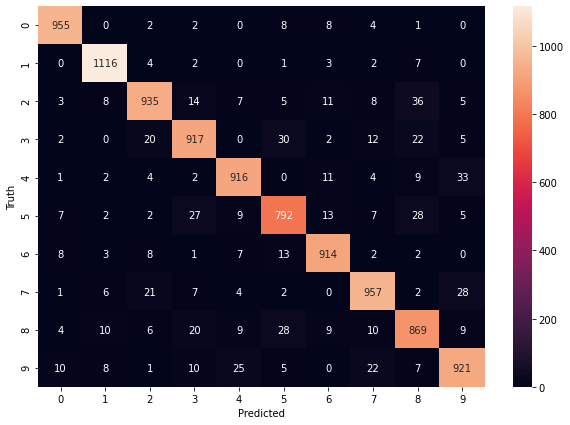

In [34]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Hidden Layer

In [35]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2697 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1218 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0852 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0500 - accuracy: 0.9852


Text(69.0, 0.5, 'Truth')

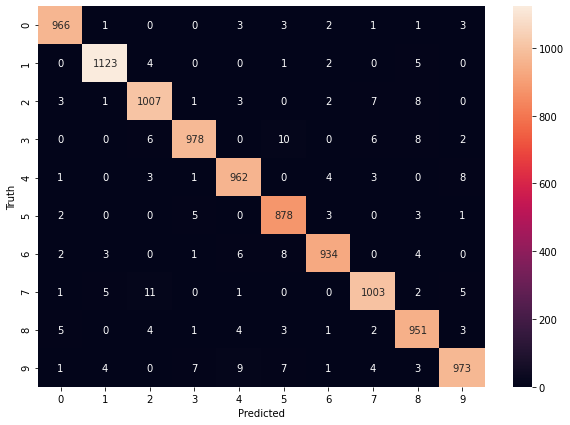

In [37]:
y_predicted = model2.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
initial_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(initial_model.summary())

initial_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

initial_history = initial_model.fit(
    X_train, 
    y_train, 
    epochs=30,
    )

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1839 - accuracy: 0.9446
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0785 - accuracy: 0.9764
Epoch 3/30
1875/1875 [===============

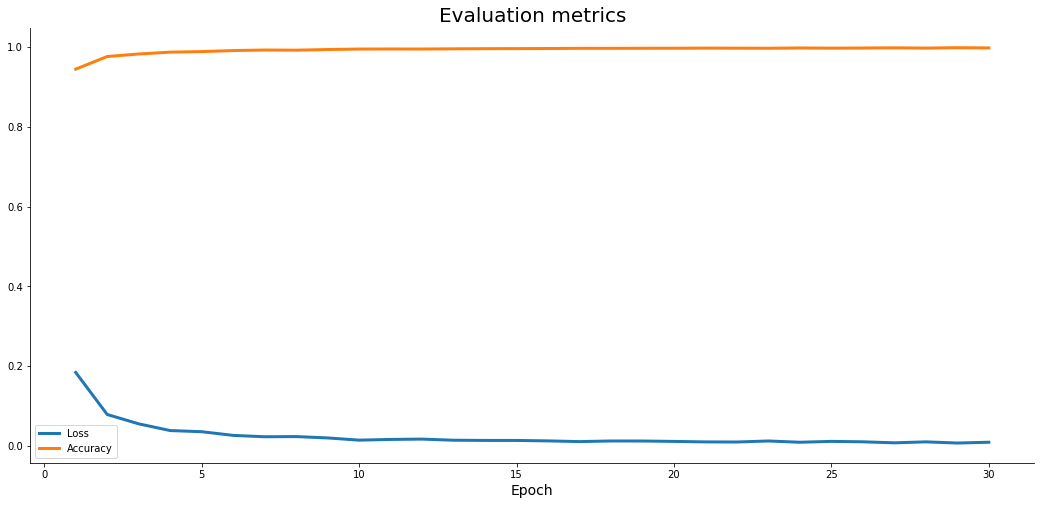

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 31), 
    initial_history.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 31), 
    initial_history.history['accuracy'], 
    label='Accuracy', lw=3
)

plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [27]:
initial_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1499 - accuracy: 0.9821


[0.1499471366405487, 0.9821000099182129]

In [28]:
initial_model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [29]:
y_predicted = initial_model.predict(X_test)

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(69.0, 0.5, 'Truth')

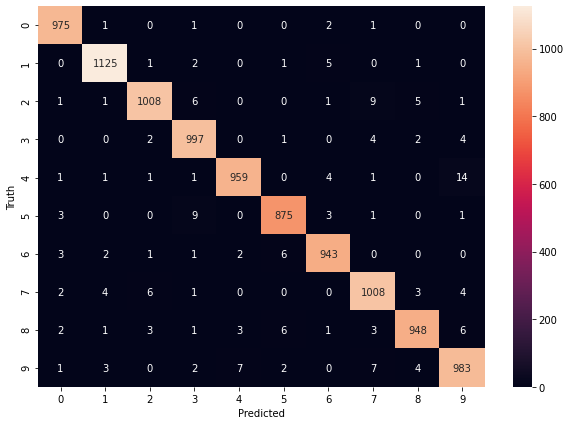

In [34]:
y_predicted = initial_model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Convert to tflight

In [36]:
saved_dir = "model"

In [38]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_typesu = [tf.float16]
model_lite = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(model_lite)